In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
housing_data = pd.read_csv('Bangalore.csv')
housing_data.head() 

,Price,Area,Location,NumBedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [3]:
varlist = ['Price','Area','NumBedrooms','Resale','MaintenanceStaff','Gymnasium','SwimmingPool','LandscapedGardens','IndoorGames']
data = housing_data[varlist].copy()

In [4]:
# checking for null values
print(data.info())

# checking for outliers
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Price              6207 non-null   int64
 1   Area               6207 non-null   int64
 2   NumBedrooms        6207 non-null   int64
 3   Resale             6207 non-null   int64
 4   MaintenanceStaff   6207 non-null   int64
 5   Gymnasium          6207 non-null   int64
 6   SwimmingPool       6207 non-null   int64
 7   LandscapedGardens  6207 non-null   int64
 8   IndoorGames        6207 non-null   int64
dtypes: int64(9)
memory usage: 436.5 KB
None
              Price         Area  NumBedrooms       Resale  MaintenanceStaff  \
count  6.207000e+03  6207.000000  6207.000000  6207.000000       6207.000000   
mean   1.058510e+07  1526.094248     2.556952     0.078782          6.208797   
std    1.410943e+07   764.845609     0.694300     0.269420          4.126883   
min    2.000000e+06   4

Text(0, 0.5, 'Price')

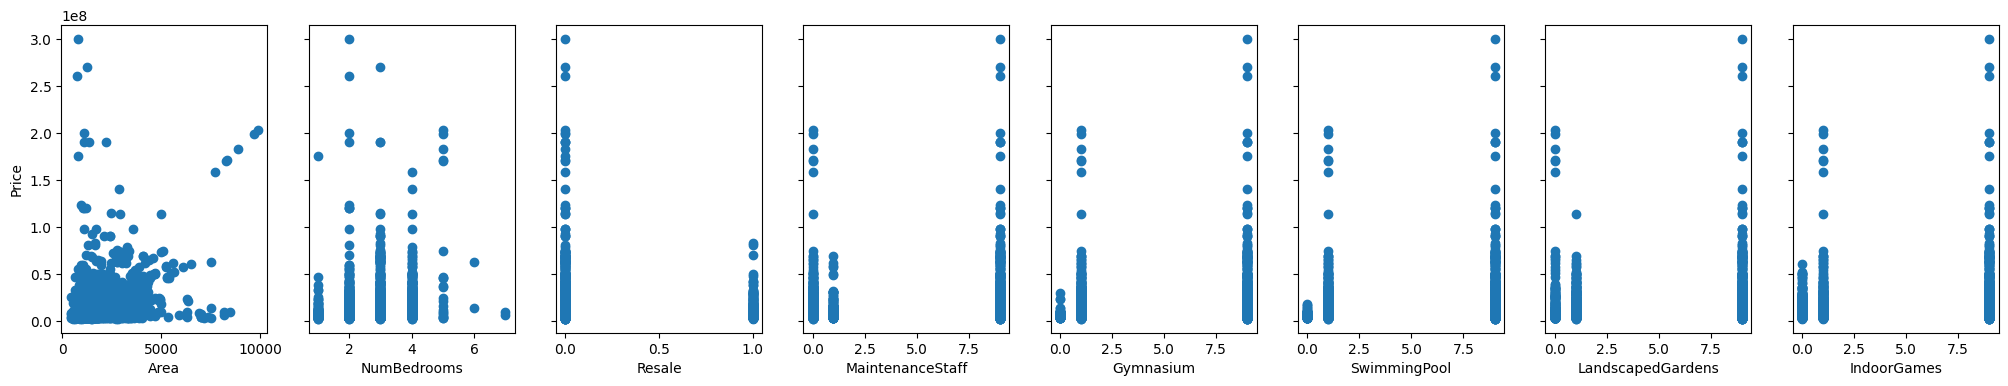

In [5]:
# some of the features like Gymnaisum should have bool values and the mean should not be more than 1
# plotting the to check if scaling is required
fig,ax = plt.subplots(1,8, figsize=(25,4), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(data[varlist[i+1]],data[varlist[0]])
    ax[i].set_xlabel(varlist[i+1])
ax[0].set_ylabel('Price')

In [6]:
# MainenanceStaff, Gymnasium, SwimmingPool, LandscapedGardens and IndoorGames needs to be manipulated
MaintenanceStaff = [i if i>1 else 0 for i in data.MaintenanceStaff]
Gymnasium = [i if i>1 else 0 for i in data.Gymnasium]
SwimmingPool = [i if i>1 else 0 for i in data.SwimmingPool]
LandscapedGardens = [i if i>1 else 0 for i in data.LandscapedGardens]
IndoorGames = [i if i>1 else 0 for i in data.IndoorGames]

In [7]:
# all the features are scaled except Area and NumBedrooms
# performing z-score normalization on Area
std_dev = np.std(data.Area)
mean = np.mean(data.Area)
Area = [(i-mean)/std_dev for i in data.Area]

# performing z-score normalization on NumBedrooms
std_dev = np.std(data.NumBedrooms)
mean = np.mean(data.NumBedrooms)
NumBedrooms = [(i-mean)/std_dev for i in data.NumBedrooms]

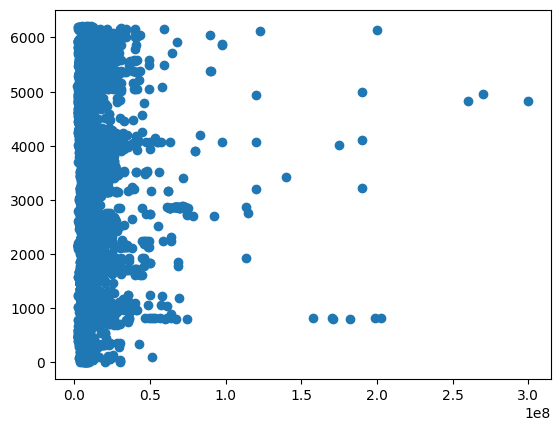

In [8]:
# plotting Price to check if scaling is required
plt.scatter(data.Price,list(range(len(data.Price))))

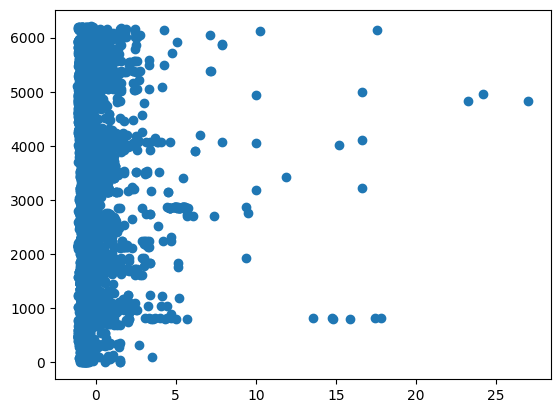

In [9]:
# some values are too large
# performing z-score normalization on price
std_dev = np.std(data.Price)
mean = np.mean(data.Price)
Price = [(i-std_dev)/mean for i in data.Price]
plt.scatter(Price,list(range(len(Price))))

Text(0, 0.5, 'Price')

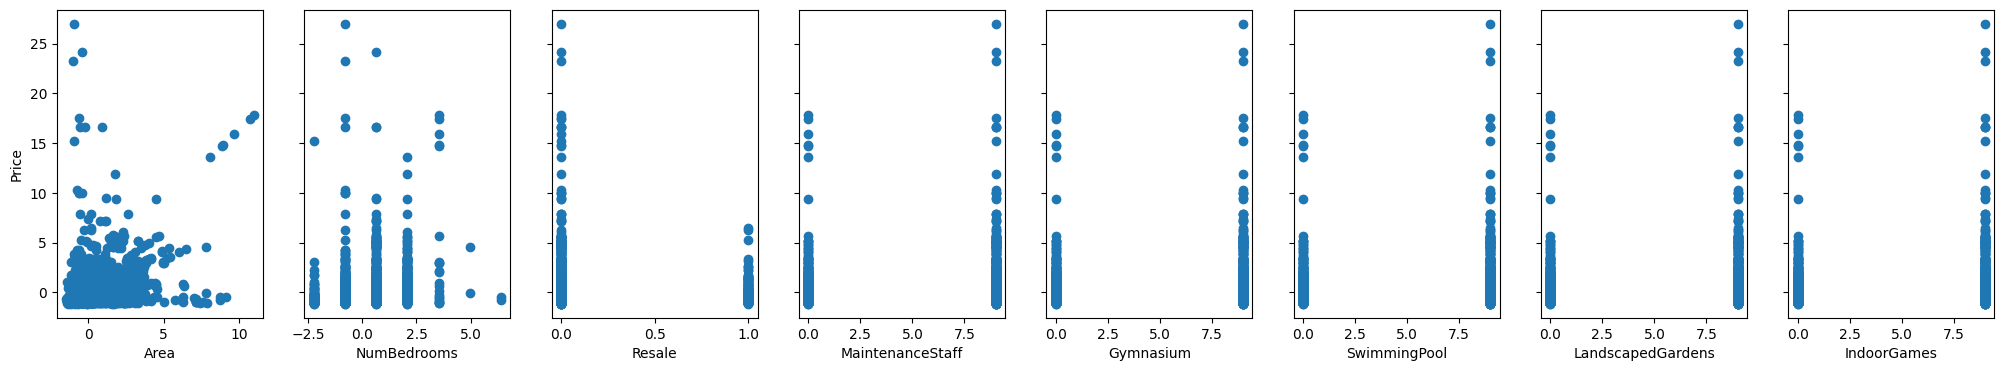

In [10]:
# combining scaled data into a single dataframe
scaled_data = pd.DataFrame()
for var in varlist:
    if var == 'Resale':
        scaled_data[var] = data.Resale
    else:
        scaled_data[var] = eval(var)

fig,ax = plt.subplots(1,8, figsize=(25,4), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(scaled_data[varlist[i+1]],scaled_data[varlist[0]])
    ax[i].set_xlabel(varlist[i+1])
ax[0].set_ylabel('Price')

In [11]:
# splitting the data into training and testing data
scaled_data = scaled_data.sample(frac=1, random_state=42).reset_index(drop=True)
train_to_test_ratio = 0.7
size = int(train_to_test_ratio * len(scaled_data))

data_train = scaled_data[size:]
data_test = scaled_data[:size]

x_train = data_train[varlist[1:]]
y_train = data_train[varlist[0]]
           